In [ ]:
# !gdown https://drive.google.com/file/d/12GHQ0J4RKeJn3aJ9WlmuemCiHfY6H0BW/view?usp=sharing
!gdown https://drive.google.com/uc?id=12GHQ0J4RKeJn3aJ9WlmuemCiHfY6H0BW
!unzip assignment13.zip

Streaming output truncated to the last 5000 lines.
  inflating: YOLOV3_customdata/customdata/images/ss_14.jpg  
  inflating: YOLOV3_customdata/customdata/images/Ka.jpg  
  inflating: YOLOV3_customdata/customdata/images/a41.jpg  
  inflating: YOLOV3_customdata/customdata/images/majdoor_128.jpg  
  inflating: YOLOV3_customdata/customdata/images/8c7b72f0.jpg  
  inflating: YOLOV3_customdata/customdata/images/mask_11.jpg  
  inflating: YOLOV3_customdata/customdata/images/Dimg035.jpg  
  inflating: YOLOV3_customdata/customdata/images/K227.jpg  
  inflating: YOLOV3_customdata/customdata/images/Bimg_73.jpg  
  inflating: YOLOV3_customdata/customdata/images/PImage29.jpg  
  inflating: YOLOV3_customdata/customdata/images/african-american-woman-wearing-hardhat-and-safety-vest-picture-id485445478.jpg  
  inflating: YOLOV3_customdata/customdata/images/majdoor_95.jpg  
  inflating: YOLOV3_customdata/customdata/images/construction-worker-working-under-blue-skies.jpg  
  inflating: YOLOV3_customdata/

In [ ]:
!rm -r YOLOV3_customdata/

### This notebook is optionally accelerated with a GPU runtime.
### If you would like to use this acceleration, please select the menu option "Runtime" -> "Change runtime type", select "Hardware Accelerator" -> "GPU" and click "SAVE"

----------------------------------------------------------------------

# MiDaS

*Author: Intel ISL*

**The MiDaS v2.1 model for computing relative depth from a single image.**

<img src="https://pytorch.org/assets/images/midas_samples.png" alt="alt" width="50%"/>

In [ ]:
import torch
midas = torch.hub.load("intel-isl/MiDaS", "MiDaS")
midas.eval()

Downloading: "https://github.com/intel-isl/MiDaS/archive/master.zip" to /root/.cache/torch/hub/master.zip


Loading weights:  None


Downloading: "https://github.com/facebookresearch/WSL-Images/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://download.pytorch.org/models/ig_resnext101_32x8-c38310e5.pth" to /root/.cache/torch/hub/checkpoints/ig_resnext101_32x8-c38310e5.pth


Downloading: "https://github.com/intel-isl/MiDaS/releases/download/v2_1/model-f6b98070.pt" to /root/.cache/torch/hub/checkpoints/model-f6b98070.pt


MidasNet(
  (pretrained): Module(
    (layer1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inpla

will load the MiDaS v2.1 model. The model expects 3-channel RGB images of shape ```(3 x H x W)```. Images are expected to be normalized using
`mean=[0.485, 0.456, 0.406]` and `std=[0.229, 0.224, 0.225]`. 
`H` and `W` need to be divisible by `32`. For optimal results `H` and `W` should be close to `384` (the training resolution). 
We provide a custom transformation that performs resizing while maintaining aspect ratio. 

### Model Description

[MiDaS](https://arxiv.org/abs/1907.01341) computes relative inverse depth from a single image. The model has been trained on 10 distinct dataset using 
multi-objective optimization to ensure high quality on a wide range of inputs.


### Example Usage

Download an image from the PyTorch homepage

In [ ]:
import cv2
import torch
import urllib.request

import matplotlib.pyplot as plt

url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
urllib.request.urlretrieve(url, filename)

('dog.jpg', <http.client.HTTPMessage at 0x7f42500c09d0>)

Load large or small model

In [ ]:
use_large_model = True

if use_large_model:
    midas = torch.hub.load("intel-isl/MiDaS", "MiDaS")
else:
    midas = torch.hub.load("intel-isl/MiDaS", "MiDaS_small")

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /root/.cache/torch/hub/facebookresearch_WSL-Images_master


Loading weights:  None


Move model to GPU if available

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

MidasNet(
  (pretrained): Module(
    (layer1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inpla

Load transforms to resize and normalize the image for large or small model

In [ ]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if use_large_model:
    transform = midas_transforms.default_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Load image and apply transforms

In [ ]:
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)

Predict and resize to original resolution

In [ ]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()
    
output = prediction.cpu().numpy()

In [ ]:
from matplotlib import pyplot

def run_midas(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    input_batch = transform(img).to(device)

    with torch.no_grad():
        prediction = midas(input_batch)

        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=img.shape[:2],
            mode="bicubic",
            align_corners=False,
        ).squeeze()
        
    output = prediction.cpu().numpy()
    # print(cv2.imwrite(filename, output))
    output_path  =  os.path.join('midas_output', os.path.basename(filename))
    pyplot.imsave(output_path, output)

In [ ]:
import os
images_path = '/content/YOLOV3_customdata/customdata/images'
def listdir_fullpath(d):
    return [os.path.join(d, f) for f in os.listdir(d)]

images_list = listdir_fullpath(images_path)


In [ ]:
run_midas(images_list[3])

In [ ]:
for count, single_image in enumerate(images_list):
    run_midas(single_image)
    print(count)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
print( os.path.join('midas_output', os.path.basename(images_list[0])))

midas_output/ImageYolo (6).jpg


Show result

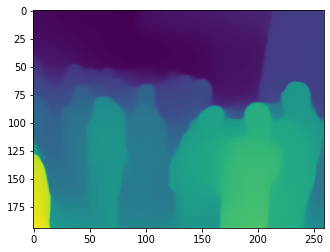

In [ ]:
plt.imshow(out)
# plt.show()

### Reference
[Towards Robust Monocular Depth Estimation: Mixing Datasets for Zero-shot Cross-dataset Transfer](https://arxiv.org/abs/1907.01341)

Please cite our paper if you use our model:

In [ ]:
@article{Ranftl2020,
	author    = {Ren\'{e} Ranftl and Katrin Lasinger and David Hafner and Konrad Schindler and Vladlen Koltun},
	title     = {Towards Robust Monocular Depth Estimation: Mixing Datasets for Zero-shot Cross-dataset Transfer},
	journal   = {IEEE Transactions on Pattern Analysis and Machine Intelligence (TPAMI)},
	year      = {2020},
}